# Run run_paper_nee

In [1]:
# Env: sc2_v0
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as pplt # New plot library (https://proplot.readthedocs.io/en/latest/)
pplt.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xskillscore as xs
import calendar
import os

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
site_byl = 'byl'
site_longname_byl = 'Bylot Island, Canadian high Arctic'
y_start_byl = 2013
y_end_byl = 2019

# labels = ['peat_30min_ext', 'peat']
labels = [
    'peat_DEF', 
    # 'Ref', #no peat
    # 'peat_BUG_CORRECT',
    # 'peat_BUG_CORRECT_TSNBT_OP1',
    # 'peat_BUG_CORRECT_TSNBT_OP1_EZERO',
    # 'peat_PHYS_ALL_SUBLI_CORRECT',
   # 'peat_PHYS_ALL_SUBLI_v2_COMPAC_v1',
   # 'peat_PHYS_ALL_SUBLI_v2_COMPAC_v1_calonne', # Best without TVC (COMPACT_2.5)
   'peat_PHYS_ALL_SUBLI_v2_COMPAC_2.5_LIM_3.5_calonne', # best with TVC
]

root_path = '/home/lalandmi/eccc/classic-develop/outputFiles/SnowArctic/'+site_byl+'/'
paths = [root_path+'run_'+label for label in labels]

# ds_yr_list = [xr.open_mfdataset(path+'/*_annually.nc').squeeze().load() for path in paths]
# ds_mo_list = [xr.open_mfdataset(path+'/*_monthly.nc').squeeze().load() for path in paths]
ds_d_list_byl = [xr.open_mfdataset(path+'/*_daily.nc').squeeze().load() for path in paths]
# ds_hh_list = [xr.open_mfdataset(path+'/*_halfhourly.nc').squeeze().load() for path in paths]

In [4]:
path = "/home/lalandmi/eccc/classic-develop/inputFiles/SnowArctic/"+site_byl
rsfile = xr.open_dataset(path+'/rsfile_spinup-final_Ref.nc')

In [5]:
def assign_center_depth(ds, rsfile):
    layer_c = []
    for i in range(len(rsfile.DELZ)):
        if i == 0:
            layer_c.append(rsfile.DELZ.cumsum().values[i]/2)
        else:
            layer_c.append(rsfile.DELZ.cumsum().values[i-1] + rsfile.DELZ.values[i]/2)
    with xr.set_options(keep_attrs=True):
        ds = ds.assign_coords(layer=ds.layer*0+layer_c)
    return ds

In [6]:
for i in range(len(labels)):
    ds_d_list_byl[i] = assign_center_depth(ds_d_list_byl[i], rsfile)

In [7]:
site_umt = 'umt'
site_longname_umt = 'Umiujaq TUNDRA, northeastern Canada'
y_start_umt = 2012
y_end_umt = 2021

labels = [
    'DEF',
    # 'Ref', #no peat
    # 'BUG_CORRECT',
    # 'BUG_CORRECT_TSNBT_OP1',
    # 'BUG_CORRECT_TSNBT_OP1_EZERO',
    # 'PHYS_ALL_SUBLI_CORRECT',
    # 'PHYS_ALL_SUBLI_v2',
    # 'PHYS_ALL_SUBLI_CORRECT_COMPAC',
    # 'PHYS_ALL_SUBLI_v2_COMPAC_v1',
    # 'PHYS_ALL_SUBLI_v2_COMPAC_v1_calonne', # Best without TVC (COMPACT_2.5)
    'PHYS_ALL_SUBLI_v2_COMPAC_2.5_LIM_3.5_calonne', # best with TVC
]

root_path = '/home/lalandmi/eccc/classic-develop/outputFiles/SnowArctic/'+site_umt+'/'
paths = [root_path+'run_'+label for label in labels]

# ds_yr_list = [xr.open_mfdataset(path+'/*_annually.nc').squeeze().load() for path in paths]
# ds_mo_list = [xr.open_mfdataset(path+'/*_monthly.nc').squeeze().load() for path in paths]
ds_d_list_umt = [xr.open_mfdataset(path+'/*_daily.nc').squeeze().load() for path in paths]
# ds_hh_list = [xr.open_mfdataset(path+'/*_halfhourly.nc').squeeze().load() for path in paths]

In [8]:
path = "/home/lalandmi/eccc/classic-develop/inputFiles/SnowArctic/"+site_umt
rsfile = xr.open_dataset(path+'/rsfile_spinup-final_Ref.nc')

In [9]:
for i in range(len(labels)):
    ds_d_list_umt[i] = assign_center_depth(ds_d_list_umt[i], rsfile)

In [10]:
site_tvc = 'tvc'
site_longname_tvc = 'Trail Valley Creak, northwestern Canada'
y_start_tvc = 2013
y_end_tvc = 2019

labels = [
    '1peat_2xSnowf_DEF',
    # 'Ref_30min_ext', #no peat
    # 'BUG_CORRECT',
    # 'BUG_CORRECT_TSNBT_OP1',
    # '1peat_2xSnowf_BUG_CORRECT_TSNBT_OP1_EZERO',
    # 'PHYS_ALL_SUBLI_CORRECT',
    # '1peat_2xSnowf_PHYS_ALL_SUBLI_v2',
    # 'PHYS_ALL_SUBLI_CORRECT_COMPAC',
    # '1peat_2xSnowf_PHYS_ALL_SUBLI_v2_COMPAC_v1',
    # '1peat_2xSnowf_PHYS_ALL_SUBLI_v2_COMPAC_v1_calonne', # Best without TVC (COMPACT_2.5)
    '1peat_2xSnowf_PHYS_ALL_SUBLI_v2_COMPAC_2.5_LIM_3.5_calonne', # best with TVC
    
]

root_path = '/home/lalandmi/eccc/classic-develop/outputFiles/SnowArctic/'+site_tvc+'/'
paths = [root_path+'run_'+label for label in labels]

# ds_yr_list = [xr.open_mfdataset(path+'/*_annually.nc').squeeze().load() for path in paths]
# ds_mo_list = [xr.open_mfdataset(path+'/*_monthly.nc').squeeze().load() for path in paths]
ds_d_list_tvc = [xr.open_mfdataset(path+'/*_daily.nc').squeeze().load() for path in paths]
# ds_hh_list = [xr.open_mfdataset(path+'/*_halfhourly.nc').squeeze().load() for path in paths]

In [11]:
path = "/home/lalandmi/eccc/classic-develop/inputFiles/SnowArctic/"+site_tvc
rsfile = xr.open_dataset(path+'/rsfile_spinup-final_Ref_30min_ext.nc')

In [12]:
for i in range(len(labels)):
    ds_d_list_tvc[i] = assign_center_depth(ds_d_list_tvc[i], rsfile)

## Convert noleap year cftime to datetime

In [13]:
ds_d_list_tvc[i].time

<xarray.DataArray 'time' (time: 2555)> Size: 20kB
array([cftime.DatetimeNoLeap(2013, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2013, 1, 2, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2013, 1, 3, 0, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(2019, 12, 29, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2019, 12, 30, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2019, 12, 31, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 20kB 2013-01-01 00:00:00 ... 2019-12-31 00:00:00
Attributes:
    long_name:  time

In [14]:
import cftime
for i in range(len(labels)):
    if isinstance(ds_d_list_tvc[i]['time'].values[0], cftime.DatetimeNoLeap):
        ds_d_list_tvc[i]['time'] = pd.to_datetime(ds_d_list_tvc[i].indexes['time'].to_datetimeindex())

## Compare with obs

In [15]:
path_obs = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/Bylot'

ds_h_obs = xr.open_dataset(path_obs+'/obs_insitu_'+site_byl+'_'+str(y_start_byl)+'_'+str(y_end_byl)+'.nc').load()
ds_d_obs_byl = ds_h_obs.resample(time='D').mean().load()

ds_d_obs_byl

<xarray.Dataset> Size: 435kB
Dimensions:         (time: 2176, sdepth: 5, sheight: 10)
Coordinates:
  * sdepth          (sdepth) float64 40B 0.02 0.05 0.1 0.15 0.21
  * sheight         (sheight) float64 80B 0.0 0.02 0.05 0.07 ... 0.27 0.35 0.37
  * time            (time) datetime64[ns] 17kB 2013-07-11 ... 2019-06-25
Data variables:
    snd_auto        (time) float64 17kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    albs            (time) float64 17kB 0.1815 0.1357 0.1493 ... 0.1625 0.1964
    flag_albs_ERA5  (time) float64 17kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ts              (time) float64 17kB 11.03 5.161 6.706 ... 5.245 4.045 4.336
    mrsll           (time, sdepth) float64 87kB 0.1981 0.4431 ... 0.08873 0.066
    tsl             (time, sdepth) float64 87kB 6.497 3.928 1.357 ... 0.79 -0.3
    tsnl            (time, sheight) float64 174kB nan nan nan ... nan nan nan
Attributes:
    reference:    Domine, F., Lackner, G., Sarrazin, D., Poirier, M., & Belke...
    description:  Converted to netCDF (SnowMIP kind of format) from original ...

In [16]:
path_obs = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/Umiujaq/Domine-etal_2024/datasets'

ds_h_obs = xr.open_dataset(path_obs+'/obs_insitu_'+site_umt+'_'+str(y_start_umt)+'_'+str(y_end_umt)+'.nc').load()

ds_d_obs_umt = ds_h_obs.resample(time='D').mean().load()
ds_d_obs_umt

<xarray.Dataset> Size: 503kB
Dimensions:   (veg: 2, sdepth: 4, time: 3309)
Coordinates:
  * veg       (veg) <U8 64B 'lichen' 'lowshrub'
  * sdepth    (sdepth) float64 32B 0.15 0.25 0.35 0.45
  * time      (time) datetime64[ns] 26kB 2012-09-28 2012-09-29 ... 2021-10-19
Data variables:
    snd_auto  (time) float64 26kB 0.0 0.01196 0.02252 ... 0.03703 0.05901 0.0582
    mrsll     (time, veg, sdepth) float64 212kB nan nan nan nan ... nan nan nan
    tsl       (time, veg, sdepth) float64 212kB nan nan nan nan ... nan nan nan
    albs      (time) float64 26kB 0.08978 0.0732 0.1486 ... 0.1283 0.119 0.1677
Attributes:
    event:          Umiujaq_2012-2021_Tundra
    link:           https://doi.pangaea.de/10.1594/PANGAEA.964743
    downloaded:     27/02/2024 by Mickaël Lalande
    original_file:  Domine-etal_2024/datasets/Umiujaq_snow_height.tab, Umiuja...

In [17]:
path_obs = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/TVC/TVCSnowCLM/TVCMetData'
ds_h_obs = xr.open_dataset(path_obs+'/obs_insitu_tvc_2017_2019.nc')
ds_d_obs_tvc = ds_h_obs.resample(time='D').mean().load()
ds_d_obs_tvc['snd_auto'] = ds_d_obs_tvc.snd_auto/100
ds_d_obs_tvc = ds_d_obs_tvc.rename({'albedo': 'albs', 'swc': 'mrsll'})
ds_d_obs_tvc

<xarray.Dataset> Size: 112kB
Dimensions:           (time: 668, sdepth: 4)
Coordinates:
  * sdepth            (sdepth) float64 32B 0.02 0.05 0.1 0.2
  * time              (time) datetime64[ns] 5kB 2017-09-01 ... 2019-06-30
Data variables: (12/14)
    snd_auto          (time) float64 5kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    tsl               (time, sdepth) float64 21kB 5.021 3.834 ... 5.732 4.72
    mrsll             (time, sdepth) float64 21kB 0.232 0.1819 ... 0.287 0.433
    SoilHEatFlux_org  (time) float64 5kB 6.104 11.39 9.86 1.357 ... nan nan nan
    SoilHEatFlux_min  (time) float64 5kB 5.848 12.86 11.75 7.613 ... nan nan nan
    NEE_filt          (time) float64 5kB -0.8253 0.1094 0.406 ... -2.071 -0.0614
    ...                ...
    NEE_filled        (time) float64 5kB 0.152 0.6982 0.6329 ... -1.871 -0.0614
    LE_filled         (time) float64 5kB 22.29 16.89 21.12 ... 32.07 27.5 -1.015
    H_filled          (time) float64 5kB 17.54 12.97 17.06 ... 78.96 -12.94
    CH4_filt          (time) float64 5kB 0.001279 0.001616 0.002003 ... nan nan
    CH4_filled        (time) float64 5kB 0.001136 0.001072 ... 0.0002559
    albs              (time) float64 5kB 0.1721 0.1551 0.209 ... 0.225 0.331
Attributes:
    location:    Trail Valley Creak
    ref:         https://doi.org/10.5194/tc-16-4201-2022
    soil_ref:    https://doi.pangaea.de/10.1594/PANGAEA.962726
    downloaded:  13/10/2024 by Mickaël Lalande
    merge:       TVCSnowCLM/TVCMetData/MSC_Snowdepth.csv and TVC_CLASSIC_2013...

In [18]:
path_obs = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/Umiujaq/Domine-etal_2024/datasets'
df_turb = pd.read_csv(path_obs+'/Umiujaq_turbulent_CO2_flux.tab', skiprows=29, delimiter='\t', parse_dates=['Date/Time'], index_col=['Date/Time'])
df_turb

,Qh [W/m**2],QF Qh,Qe [W/m**2],QF Qe,CO2 flux [µmol/m**2/s],QF CO2 flux
Date/Time,,,,,,
2017-06-10 15:00:00,76.441,1,-23.175,1,-7.882,0
2017-06-10 15:30:00,83.783,1,82.376,1,0.983,0
2017-06-10 16:00:00,76.397,1,46.145,1,-3.274,0
2017-06-10 16:30:00,77.477,1,46.932,1,-9.641,0
2017-06-10 17:00:00,78.918,1,-28.091,1,-1.614,1
...,...,...,...,...,...,...
2020-04-30 17:00:00,3.892,0,10.298,0,-0.067,0
2020-04-30 17:30:00,-1.309,0,3.916,0,-0.105,0
2020-04-30 18:00:00,-4.647,0,1.461,0,-0.081,0


In [19]:
ds_turb = df_turb.to_xarray()
ds_turb = ds_turb.rename({'Date/Time': 'time', 'Qh [W/m**2]': 'hfss', 'Qe [W/m**2]': 'hfls', 'CO2 flux [µmol/m**2/s]': 'nee'})
ds_turb['hfss'].attrs = {'units': 'W/m$^2$'}
ds_turb['hfls'].attrs = {'units': 'W/m$^2$'}
ds_turb['nee'].attrs = {'units': 'µmol m$^{-2}$ s$^{-1}$'}
ds_turb

<xarray.Dataset> Size: 3MB
Dimensions:      (time: 50649)
Coordinates:
  * time         (time) datetime64[ns] 405kB 2017-06-10T15:00:00 ... 2020-04-...
Data variables:
    hfss         (time) float64 405kB 76.44 83.78 76.4 ... -4.647 -7.894 -10.42
    QF Qh        (time) int64 405kB 1 1 1 1 1 1 1 1 1 1 ... 0 0 0 0 0 0 0 0 0 0
    hfls         (time) float64 405kB -23.18 82.38 46.15 ... 1.461 -0.158 -0.081
    QF Qe        (time) int64 405kB 1 1 1 1 1 1 1 1 1 1 ... 0 0 0 0 0 0 0 0 0 0
    nee          (time) float64 405kB -7.882 0.983 -3.274 ... -0.022 0.137
    QF CO2 flux  (time) int64 405kB 0 0 0 0 1 1 1 1 1 1 ... 0 0 0 0 0 0 0 0 0 0

In [20]:
ds_d_turb = ds_turb.resample(time='D').mean().load()
ds_d_turb

<xarray.Dataset> Size: 59kB
Dimensions:      (time: 1056)
Coordinates:
  * time         (time) datetime64[ns] 8kB 2017-06-10 2017-06-11 ... 2020-04-30
Data variables:
    hfss         (time) float64 8kB 25.74 52.04 8.584 ... -21.79 -4.363 -3.511
    QF Qh        (time) float64 8kB 1.0 0.04167 0.0 0.375 ... 0.2083 0.0 0.0 0.0
    hfls         (time) float64 8kB -19.92 35.8 14.05 ... 6.472 5.114 1.974
    QF Qe        (time) float64 8kB 1.0 0.2708 0.3542 0.7708 ... 0.0 0.0 0.0 0.0
    nee          (time) float64 8kB -0.6061 -0.8551 -0.6676 ... -0.1087 -0.01772
    QF CO2 flux  (time) float64 8kB 0.7778 0.1042 0.3333 0.7708 ... 0.0 0.0 0.0

In [21]:
y_start_byl

2013

In [22]:
# label_exps = ['DEF', 'PHYS', '+ SUBLI', '+ COMPAC', '+ CL11', 'ALL_TVC']
# label_exps = ['DEF', 'DEF (no peat)', 'ALL_TVC']
label_exps = ['DEF', 'ALL_TVC']


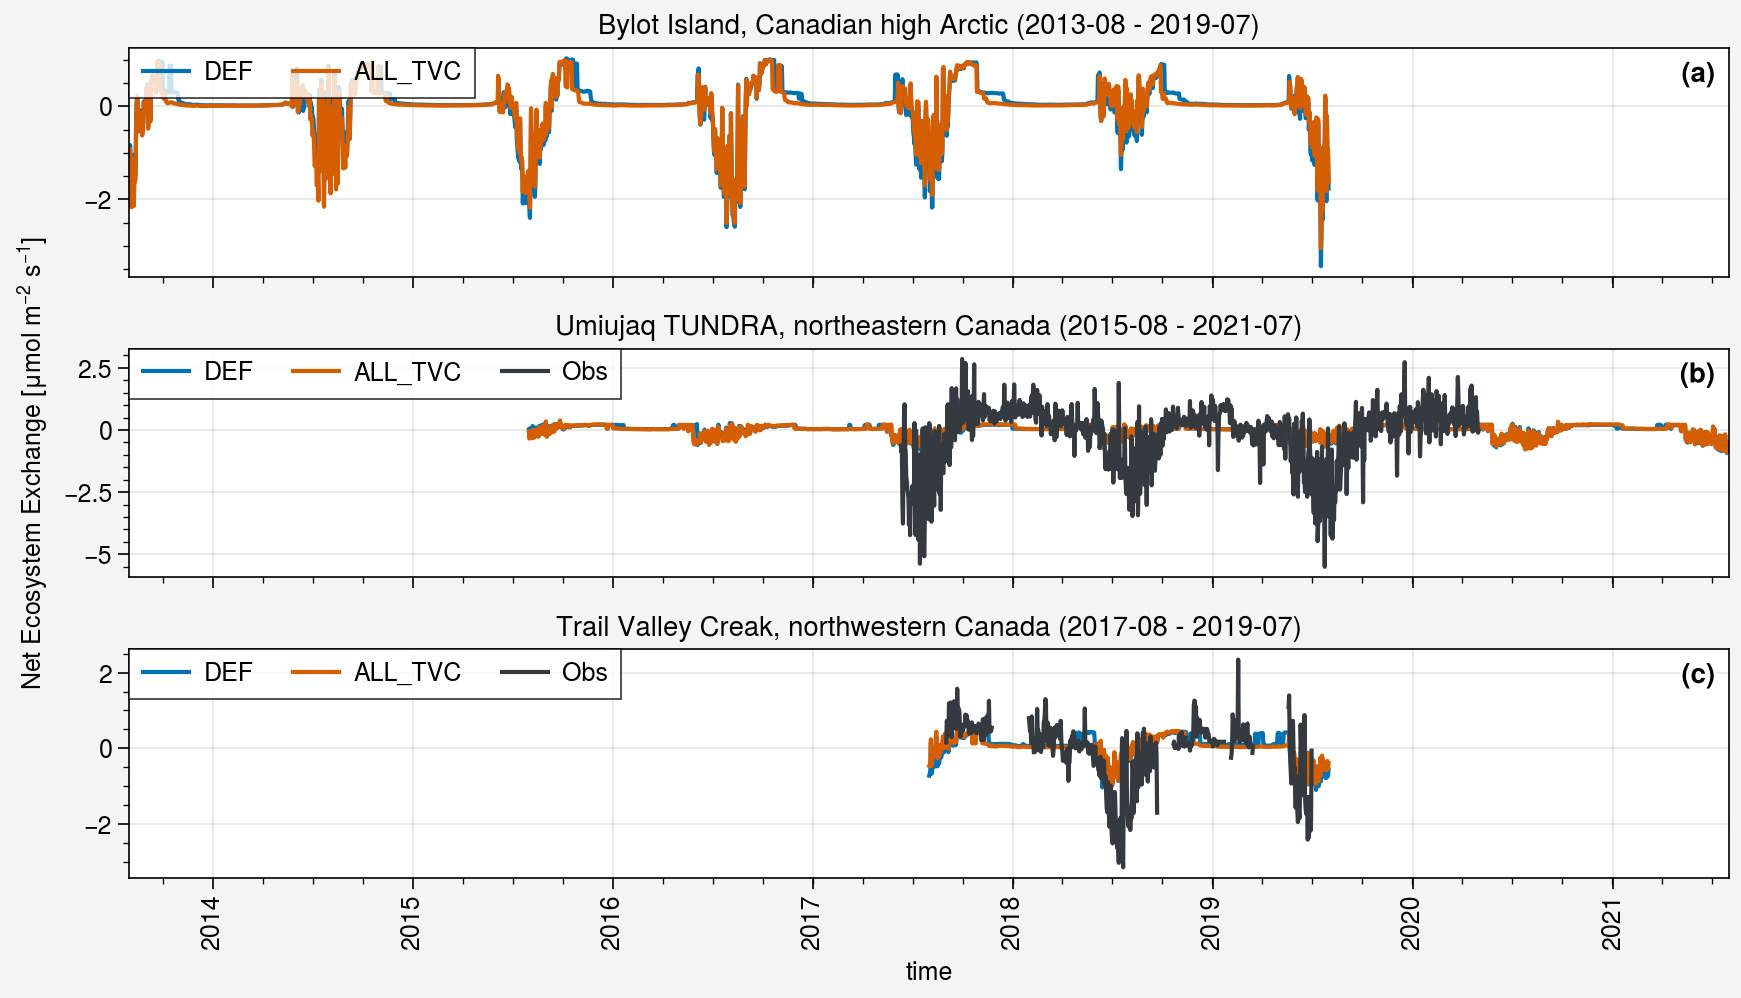

In [23]:
%matplotlib inline
color_obs = 'gray8'

fig, axs = pplt.subplots(ncols=1, nrows=3, refaspect=7, refwidth=8)


###########
### byl ###
###########

period=slice(str(y_start_byl)+'-08',str(y_end_byl)+'-07')

# Simus
for ds_d, label, label_exp in zip(ds_d_list_byl, labels, label_exps):
    axs[0].plot(-ds_d.nep.sel(time=period)*86400e3, label=label_exp)
    
# Obs
# axs[0].plot(ds_d_obs_byl.mrsll.sel(time=period), color=color_obs, label='Obs')
axs[0].format(title=site_longname_byl + ' (' + period.start+' - '+period.stop + ')', ylabel='Net Ecosystem Exchange [$\mu$mol m$^{-2}$ s$^{-1}$]')



###########
### umt ###
###########

period=slice('2015-08',str(y_end_umt)+'-07')

sdepth = 0.15
sdepth_label = str(int(sdepth*100))
# Simus
for ds_d, label, label_exp in zip(ds_d_list_umt, labels, label_exps):
    axs[1].plot(-ds_d.nep.sel(time=period)*86400e3, label=label_exp)
    
# Obs
axs[1].plot(ds_d_turb.nee.sel(time=period)*1.038, color=color_obs, label='Obs')
axs[1].format(title=site_longname_umt + ' (' + period.start+' - '+period.stop + ')', ylabel='Net Ecosystem Exchange [$\mu$mol m$^{-2}$ s$^{-1}$]')



###########
### tvc ###
###########

period=slice('2017-08',str(y_end_tvc)+'-07')

sdepth = 0.05
sdepth_label = str(int(sdepth*100))
# Simus
for ds_d, label, label_exp in zip(ds_d_list_tvc, labels, label_exps):
    axs[2].plot(-ds_d.nep.sel(time=period)*86400e3, label=label_exp)
    
# Obs
axs[2].plot(ds_d_obs_tvc.NEE_filled.sel(time=period)*1.038, color=color_obs, label='Obs')
axs[2].format(title=site_longname_tvc + ' (' + period.start+' - '+period.stop + ')', ylabel='Net Ecosystem Exchange [$\mu$mol m$^{-2}$ s$^{-1}$]')

for ax in axs:
    # ax.format(ylim=(0,0.9))
    ax.legend(loc='ul')

fig.format(abc='(a)', abcloc='ur')
# fig.suptitle(site_longname_byl)

# fig.save('arctic_vwc.png')
# fig.save('arctic_vwc.jpg')
# fig.save('arctic_vwc.pdf')

In [24]:
ds_d.nep

<xarray.DataArray 'nep' (time: 2555)> Size: 20kB
array([-5.07641831e-10, -5.46692589e-10, -5.83443791e-10, ...,
       -1.63309030e-10, -1.79788619e-10, -1.88928103e-10])
Coordinates:
  * time     (time) datetime64[ns] 20kB 2013-01-01 2013-01-02 ... 2019-12-31
Attributes:
    long_name:   Natural flux of CO2 (expressed as a mass flux of carbon) fro...
    units:       kg m$^{-2}$ s$^{-1}$
    nameInCode:  nep_d_g

## Conversions

µmol CO₂ to gC

Molecular weight of CO₂

Carbon (C) = 12.01 g/mol
Oxygen (O₂) = 2 × 16.00 g/mol = 32.00 g/mol
Total CO₂ molar mass = 44.01 g/mol


1. Each molecule of CO₂ contains one carbon atom, so:
$$
1 \mu mol CO_2 = 1 \mu mol C = 10^{-6} mol C = 12.01 \times 10^{-6} gC
$$

2. Convert per second to per day:
$$
1 \mu mol CO_2 m^{-2} s^{-1} = 12.01 \times  10^{-6} \times 86400 gC m^{-2} d^{-1} = 1.038 gC m^{-2} d^{-1}
$$

In [25]:
1e-6

1e-06

In [26]:
10**(-6)

1e-06

In [40]:
12.01*86400*1e-6

1.037664

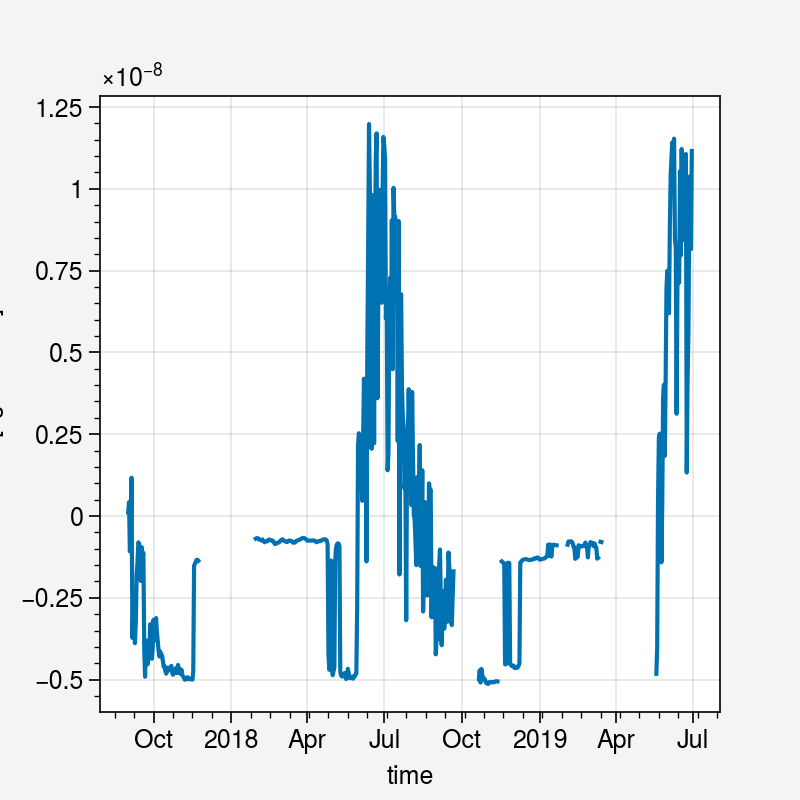

In [34]:
ds_d_list_tvc[0].nep.sel(time=period).where(~ds_d_obs_tvc.NEE_filled.sel(time=period).isnull()).plot()

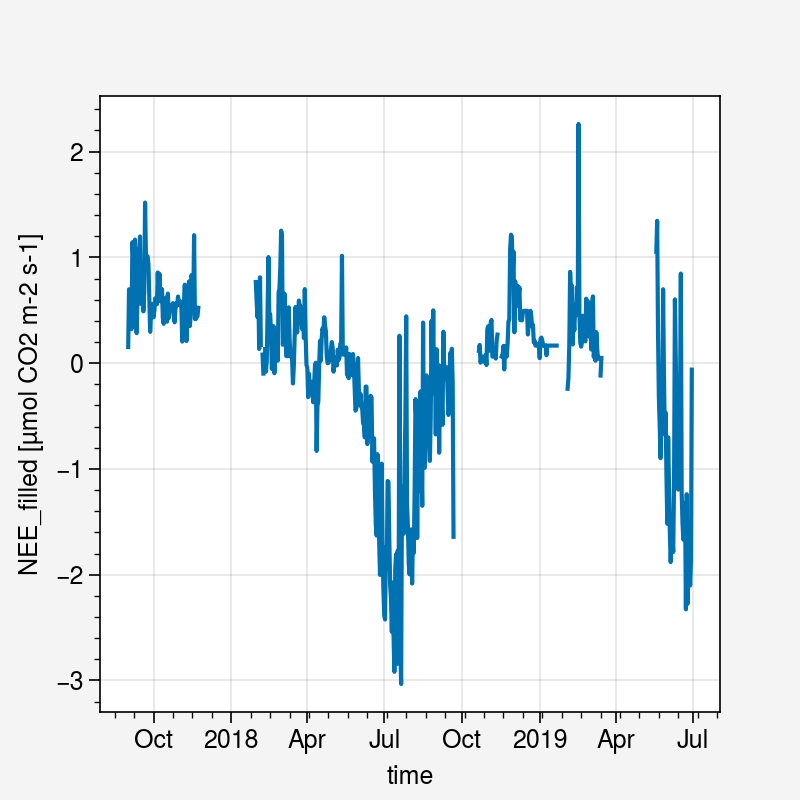

In [35]:
ds_d_obs_tvc.NEE_filled.sel(time=period).plot()

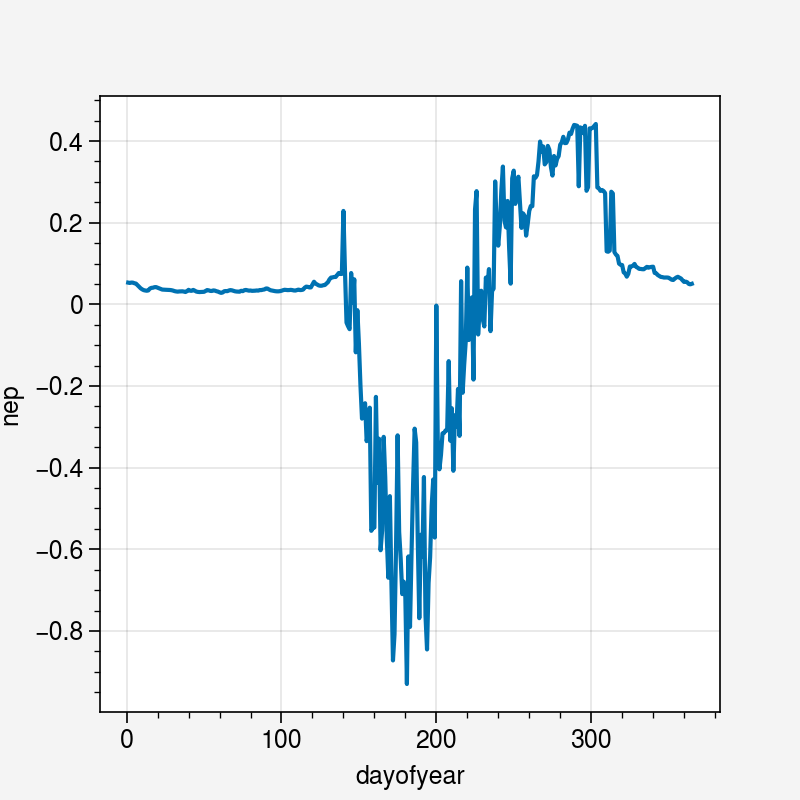

In [51]:
(-ds_d.nep.sel(time=period).groupby('time.dayofyear').mean()*86400e3).plot()

In [56]:
a = -ds_d.nep.sel(time=period).groupby('time.dayofyear').mean()*86400e3

In [57]:
a.sum()

<xarray.DataArray 'nep' ()> Size: 8B
array(2.76031733)

In [58]:
a.where(a > 0).sum()

<xarray.DataArray 'nep' ()> Size: 8B
array(34.83939292)

In [59]:
a.where(a < 0).sum()

<xarray.DataArray 'nep' ()> Size: 8B
array(-32.0790756)

In [55]:
(-ds_d.nep.sel(time=period).groupby('time.dayofyear').mean()*86400e3).sum()

<xarray.DataArray 'nep' ()> Size: 8B
array(2.76031733)

In [55]:
(-ds_d.nep.sel(time=period).groupby('time.dayofyear').mean()*86400e3).sum()

<xarray.DataArray 'nep' ()> Size: 8B
array(2.76031733)

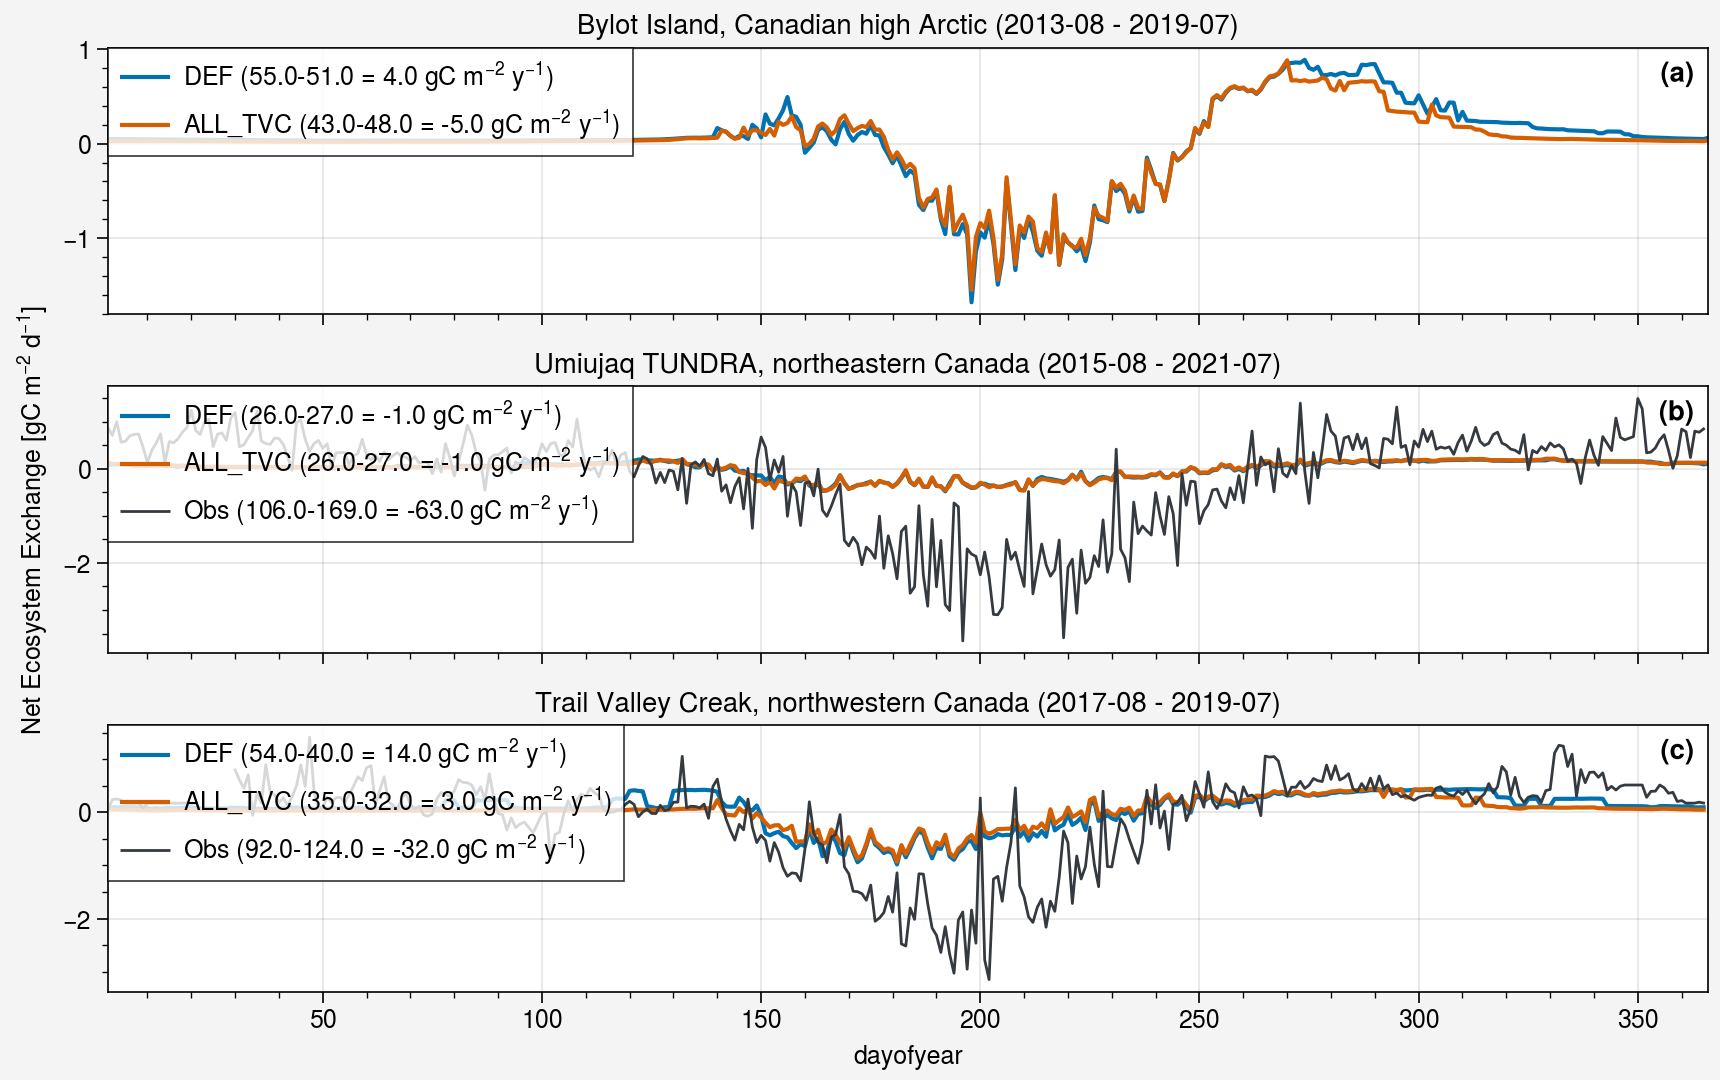

In [77]:
%matplotlib inline
color_obs = 'gray8'

fig, axs = pplt.subplots(ncols=1, nrows=3, refaspect=6, refwidth=8)


###########
### byl ###
###########

period=slice(str(y_start_byl)+'-08',str(y_end_byl)+'-07')

# Simus
for ds_d, label, label_exp in zip(ds_d_list_byl, labels, label_exps):
    nep_daily = -ds_d.nep.sel(time=period).groupby('time.dayofyear').mean()*86400e3
    
    nep_yearly_budget = nep_daily.sum()
    uptake = nep_daily.where(nep_daily < 0).sum()
    emission = nep_daily.where(nep_daily > 0).sum()
    
    # lab_details = ' (Ann bal: '+str(np.round(nep_yearly_budget.values))+')'
    lab_details = ' ('+str(np.round(emission.values))+str(np.round(uptake.values))+' = '+str(np.round(nep_yearly_budget.values))+' gC m$^{-2}$ y$^{-1}$)'
    
    axs[0].plot(nep_daily, label=label_exp + lab_details)
    
# Obs
# axs[0].plot(ds_d_obs_byl.mrsll.sel(time=period), color=color_obs, label='Obs')
axs[0].format(title=site_longname_byl + ' (' + period.start+' - '+period.stop + ')', ylabel='Net Ecosystem Exchange [gC m$^{-2}$ d$^{-1}$]')



###########
### umt ###
###########

period=slice('2015-08',str(y_end_umt)+'-07')

sdepth = 0.15
sdepth_label = str(int(sdepth*100))
# Simus
for ds_d, label, label_exp in zip(ds_d_list_umt, labels, label_exps):
    nep_daily = -ds_d.nep.sel(time=period).groupby('time.dayofyear').mean()*86400e3 #kgC/m2/s -> gC/m2/d
    
    nep_yearly_budget = nep_daily.sum()
    uptake = nep_daily.where(nep_daily < 0).sum()
    emission = nep_daily.where(nep_daily > 0).sum()
    
    # lab_details = ' (Ann bal: '+str(np.round(nep_yearly_budget.values))+')'
    lab_details = ' ('+str(np.round(emission.values))+str(np.round(uptake.values))+' = '+str(np.round(nep_yearly_budget.values))+' gC m$^{-2}$ y$^{-1}$)'
    
    axs[1].plot(nep_daily, label=label_exp + lab_details)
    
# Obs
nep_daily = ds_d_turb.nee.sel(time=period).groupby('time.dayofyear').mean()*1.038 #µmolCO2/m2/s -> gC/m2/d

nep_yearly_budget = nep_daily.sum()
uptake = nep_daily.where(nep_daily < 0).sum()
emission = nep_daily.where(nep_daily > 0).sum()

# lab_details = ' (Ann bal: '+str(np.round(nep_yearly_budget.values))+')'
lab_details = ' ('+str(np.round(emission.values))+str(np.round(uptake.values))+' = '+str(np.round(nep_yearly_budget.values))+' gC m$^{-2}$ y$^{-1}$)'
    
axs[1].plot(nep_daily, color=color_obs, label='Obs' + lab_details, lw=1)
# axs[1].plot(ds_d_turb.nee.sel(time=period).groupby('time.dayofyear').mean()*0.328, color=color_obs, label='Obs', lw=1)
axs[1].format(title=site_longname_umt + ' (' + period.start+' - '+period.stop + ')', ylabel='Net Ecosystem Exchange [gC m$^{-2}$ d$^{-1}$]')


###########
### tvc ###
###########

period=slice('2017-08',str(y_end_tvc)+'-07')

sdepth = 0.05
sdepth_label = str(int(sdepth*100))
# Simus
for ds_d, label, label_exp in zip(ds_d_list_tvc, labels, label_exps):
    nep_daily = -ds_d.nep.sel(time=period).groupby('time.dayofyear').mean()*86400e3
    
    nep_yearly_budget = nep_daily.sum()
    uptake = nep_daily.where(nep_daily < 0).sum()
    emission = nep_daily.where(nep_daily > 0).sum()
    
    # lab_details = ' (Ann bal: '+str(np.round(nep_yearly_budget.values))+')'
    lab_details = ' ('+str(np.round(emission.values))+str(np.round(uptake.values))+' = '+str(np.round(nep_yearly_budget.values))+' gC m$^{-2}$ y$^{-1}$)'
    
    axs[2].plot(nep_daily, label=label_exp + lab_details)
    
# Obs
nep_daily = ds_d_obs_tvc.NEE_filled.sel(time=period).groupby('time.dayofyear').mean()*1.038 #µmolCO2/m2/s -> gC/m2/d

nep_yearly_budget = nep_daily.sum()
uptake = nep_daily.where(nep_daily < 0).sum()
emission = nep_daily.where(nep_daily > 0).sum()

# lab_details = ' (Ann bal: '+str(np.round(nep_yearly_budget.values))+')'
lab_details = ' ('+str(np.round(emission.values))+str(np.round(uptake.values))+' = '+str(np.round(nep_yearly_budget.values))+' gC m$^{-2}$ y$^{-1}$)'
    
axs[2].plot(nep_daily, color=color_obs, label='Obs' + lab_details, lw=1)
# axs[2].plot(ds_d_obs_tvc.NEE_filled.sel(time=period).groupby('time.dayofyear').mean()*1.038, color=color_obs, label='Obs', lw=1)
# axs[2].plot(ds_d_obs_tvc.NEE_filled.sel(time=period).groupby('time.dayofyear').mean()*0.328, color=color_obs, label='Obs', lw=1)
axs[2].format(title=site_longname_tvc + ' (' + period.start+' - '+period.stop + ')', ylabel='Net Ecosystem Exchange [gC m$^{-2}$ d$^{-1}$]')

for ax in axs:
    # ax.format(ylim=(0,0.9))
    ax.legend(loc='ul', ncols=1)

fig.format(abc='(a)', abcloc='ur')
# fig.suptitle(site_longname_byl)

fig.save('arctic_nee.png')
fig.save('arctic_nee.jpg')
fig.save('arctic_nee.pdf')